Proyecto Investigación


- Pamela Jacqueline Selman David - 25002792
- Ana Lilian Aguilar Hernández - 17001130
- Hugo Danilo Castillo Torres  - 10002874

Este conjunto de datos proporciona datos detallados sobre la calidad del aire urbano y el impacto en la salud de las principales ciudades de EE. UU. Incluye condiciones climáticas, métricas de contaminación del aire (PM2.5, NO2, CO2) e información relacionada con la salud, como visitas al hospital y problemas de salud. El conjunto de datos está diseñado para ayudar a analizar la relación entre los factores ambientales y la salud pública, ofreciendo información sobre cómo la calidad del aire y las condiciones climáticas afectan los resultados de salud.

In [604]:
# Librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [605]:
# Dataset "Urban Air Quality and Health Impact Analysis"
df = pd.read_csv("dataset.csv")

# Exploratory Data Analysis

### Exploracion Basica

In [606]:
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [607]:
df.columns

Index(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch',
       'moonphase', 'conditions', 'description', 'icon', 'stations', 'source',
       'City', 'Temp_Range', 'Heat_Index', 'Severity_Score', 'Condition_Code',
       'Month', 'Season', 'Day_of_Week', 'Is_Weekend', 'Health_Risk_Score'],
      dtype='object')

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

In [609]:
print("\nConteo por tipo de variables:\n", df.dtypes.value_counts())


Conteo por tipo de variables:
 float64    33
object     12
bool        1
Name: count, dtype: int64


In [610]:
# Agrupar por tipos de columnas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist

In [611]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,569.0,1000.0,1000.000000
mean,1.726284e+09,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,0.032135,...,12.923695,1.726309e+09,1.726353e+09,0.383811,16.469899,80.195613,3.057743,0.0,9.0,9.729103
std,3.745834e+05,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,0.083461,...,8.838858,3.753453e+05,3.753012e+05,0.147229,5.552785,6.053805,0.624024,0.0,0.0,0.679728
min,1.725624e+09,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,-0.021213,...,7.507579,1.725668e+09,1.725686e+09,0.123494,1.676587,65.511677,1.578048,0.0,9.0,8.492431
25%,1.725948e+09,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,-0.000511,...,9.705341,1.725976e+09,1.726021e+09,0.247940,13.319119,76.287207,2.583375,0.0,9.0,9.195244
50%,1.726285e+09,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,0.004000,...,10.080919,1.726312e+09,1.726352e+09,0.385185,16.694710,78.562345,3.026242,0.0,9.0,9.546156
75%,1.726616e+09,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,0.015258,...,10.860683,1.726642e+09,1.726687e+09,0.516248,20.734495,85.318985,3.507127,0.0,9.0,10.242523
max,1.727021e+09,107.797400,91.635546,99.851684,105.060170,89.369854,98.193984,76.648668,92.459293,0.471666,...,61.727919,1.726991e+09,1.727027e+09,0.649488,29.790757,96.684162,5.158112,0.0,9.0,11.485725


### Ciudades y Estaciones


 Ciudades disponibles: 10


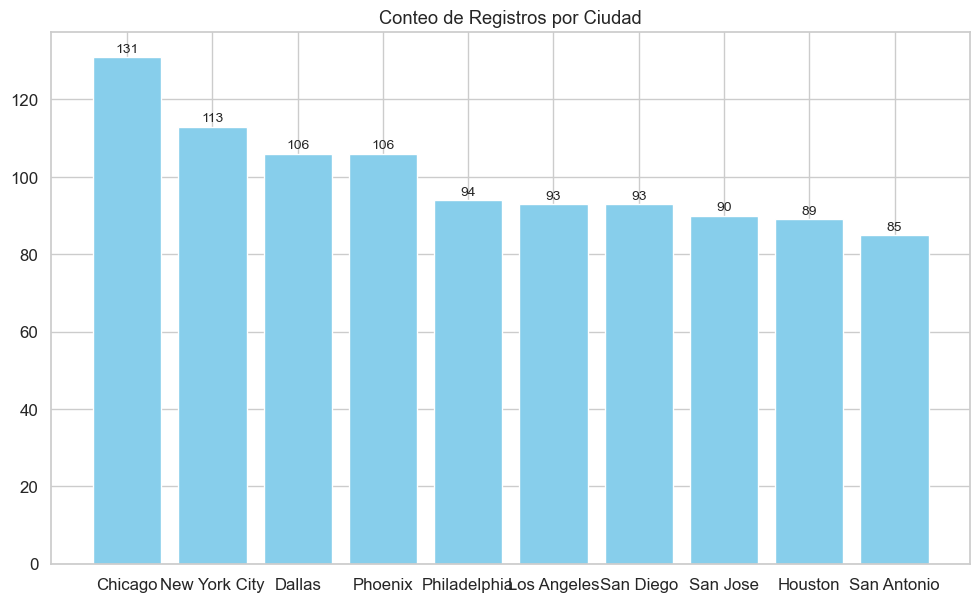

In [612]:
print("\n Ciudades disponibles:", df["City"].nunique())

# Contar registros por ciudad
city_counts = df["City"].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(city_counts.index, city_counts.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.5,
        int(yval),
        ha='center', va='bottom', fontsize=10
    )
plt.tight_layout()
plt.title("Conteo de Registros por Ciudad")
plt.show()

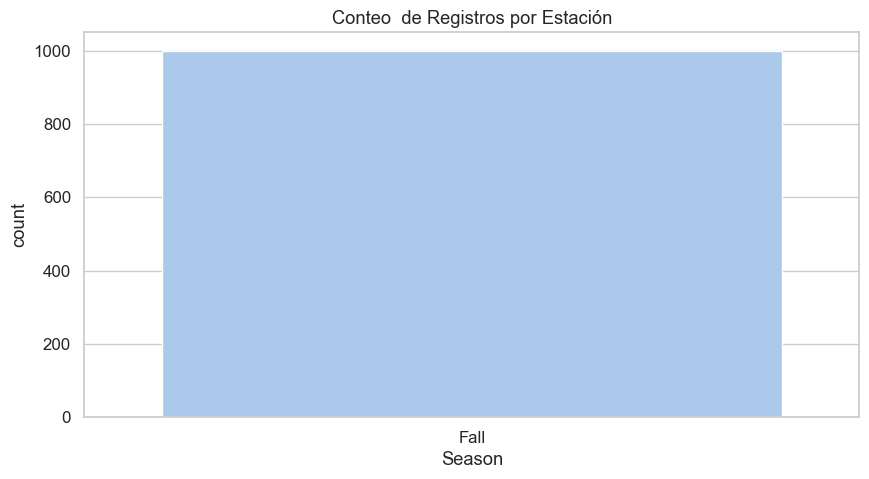

In [613]:
# Registros por Estación
sns.countplot(data=df, x="Season", order=df["Season"].value_counts().index)
plt.title("Conteo  de Registros por Estación")
plt.show()

### Distribucion Health_Risk_Score

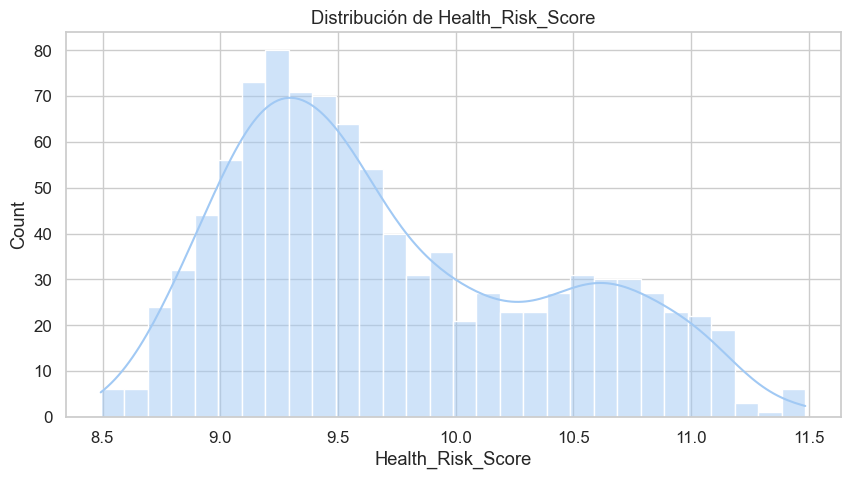

In [614]:
sns.histplot(df["Health_Risk_Score"], kde=True, bins=30)
plt.title("Distribución de Health_Risk_Score")
plt.xlabel("Health_Risk_Score")
plt.show()

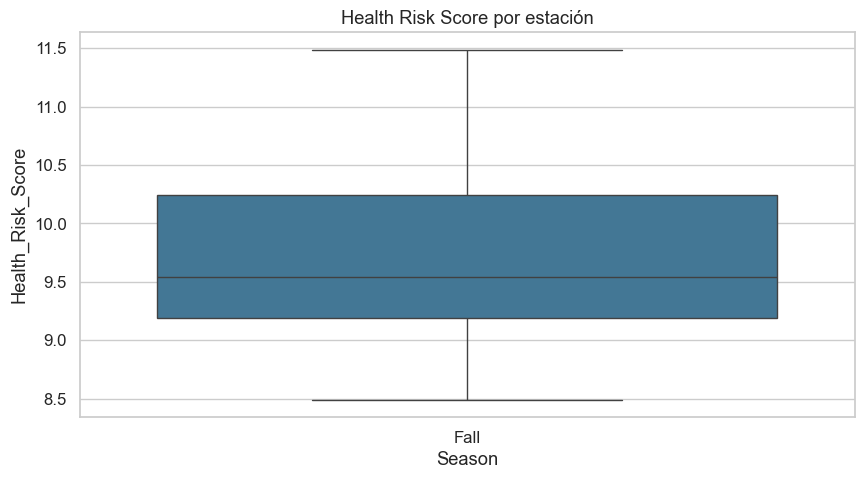

In [615]:
sns.boxplot(data=df, x="Season", y="Health_Risk_Score", palette="mako")
plt.title("Health Risk Score por estación")
plt.show()

### Distribucion Variables Climaticas

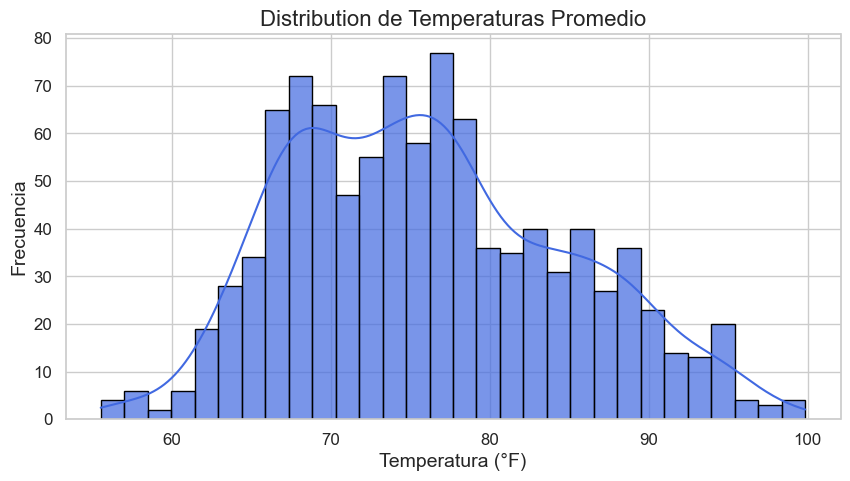

In [616]:
# Distribucion de Temperatura Promedio
sns.histplot(df['temp'], bins=30, kde=True, color='royalblue', edgecolor='black', alpha=0.7)
plt.title('Distribution de Temperaturas Promedio', fontsize=16)
plt.xlabel('Temperatura (°F)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)
plt.show()

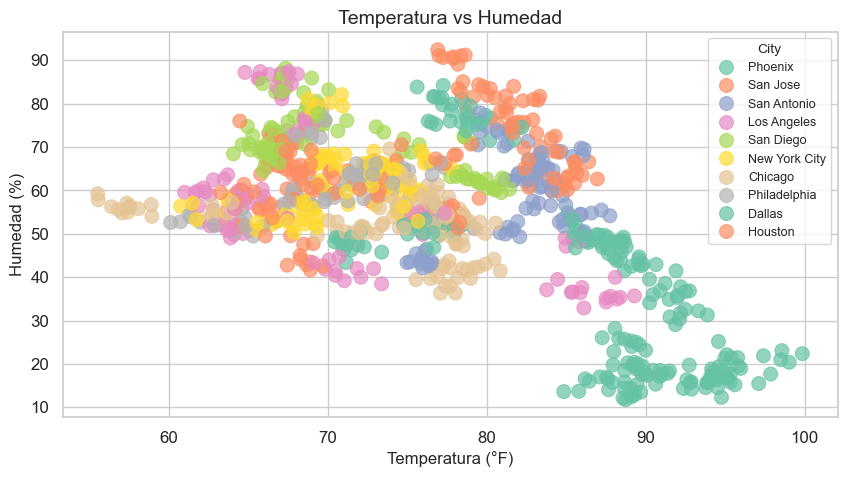

In [617]:
# Scatterplot de Temperatura y Humedad por Ciudad
sns.scatterplot(x='temp', y='humidity', hue='City', data=df, palette='Set2', alpha=0.7, s=100, edgecolor=None)
plt.title('Temperatura vs Humedad', fontsize=14)
plt.xlabel('Temperatura (°F)', fontsize=12)
plt.ylabel('Humedad (%)', fontsize=12)
plt.legend(title='City', title_fontsize='10', fontsize='9')
plt.grid(True)
plt.show()

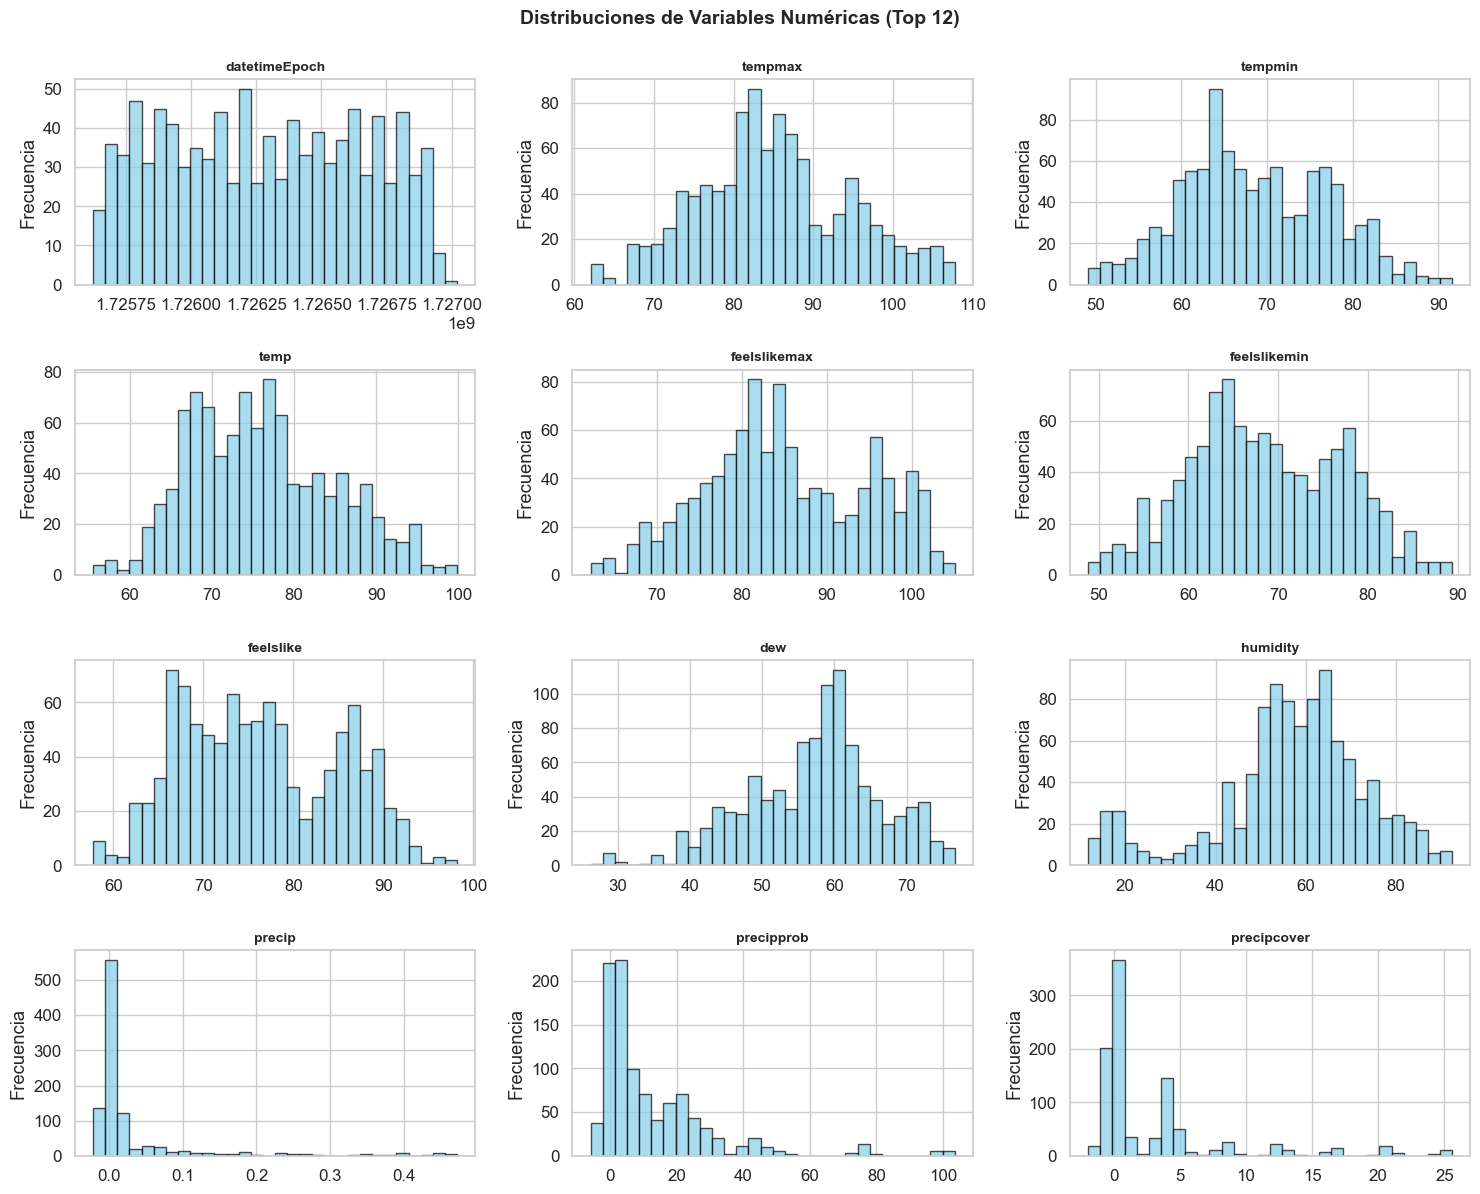

In [618]:
# Distribuciones (Histogramas de variables)

n_vars = min(12, len(num_cols))  # Mostrar máximo 12, puede cambiarse a conveniencia
cols_to_plot = num_cols[:n_vars]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    df[col].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=10, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribuciones de Variables Numéricas (Top 12)', fontsize=14, weight='bold', y=0.995)
plt.tight_layout()
plt.show()

### Correlaciones

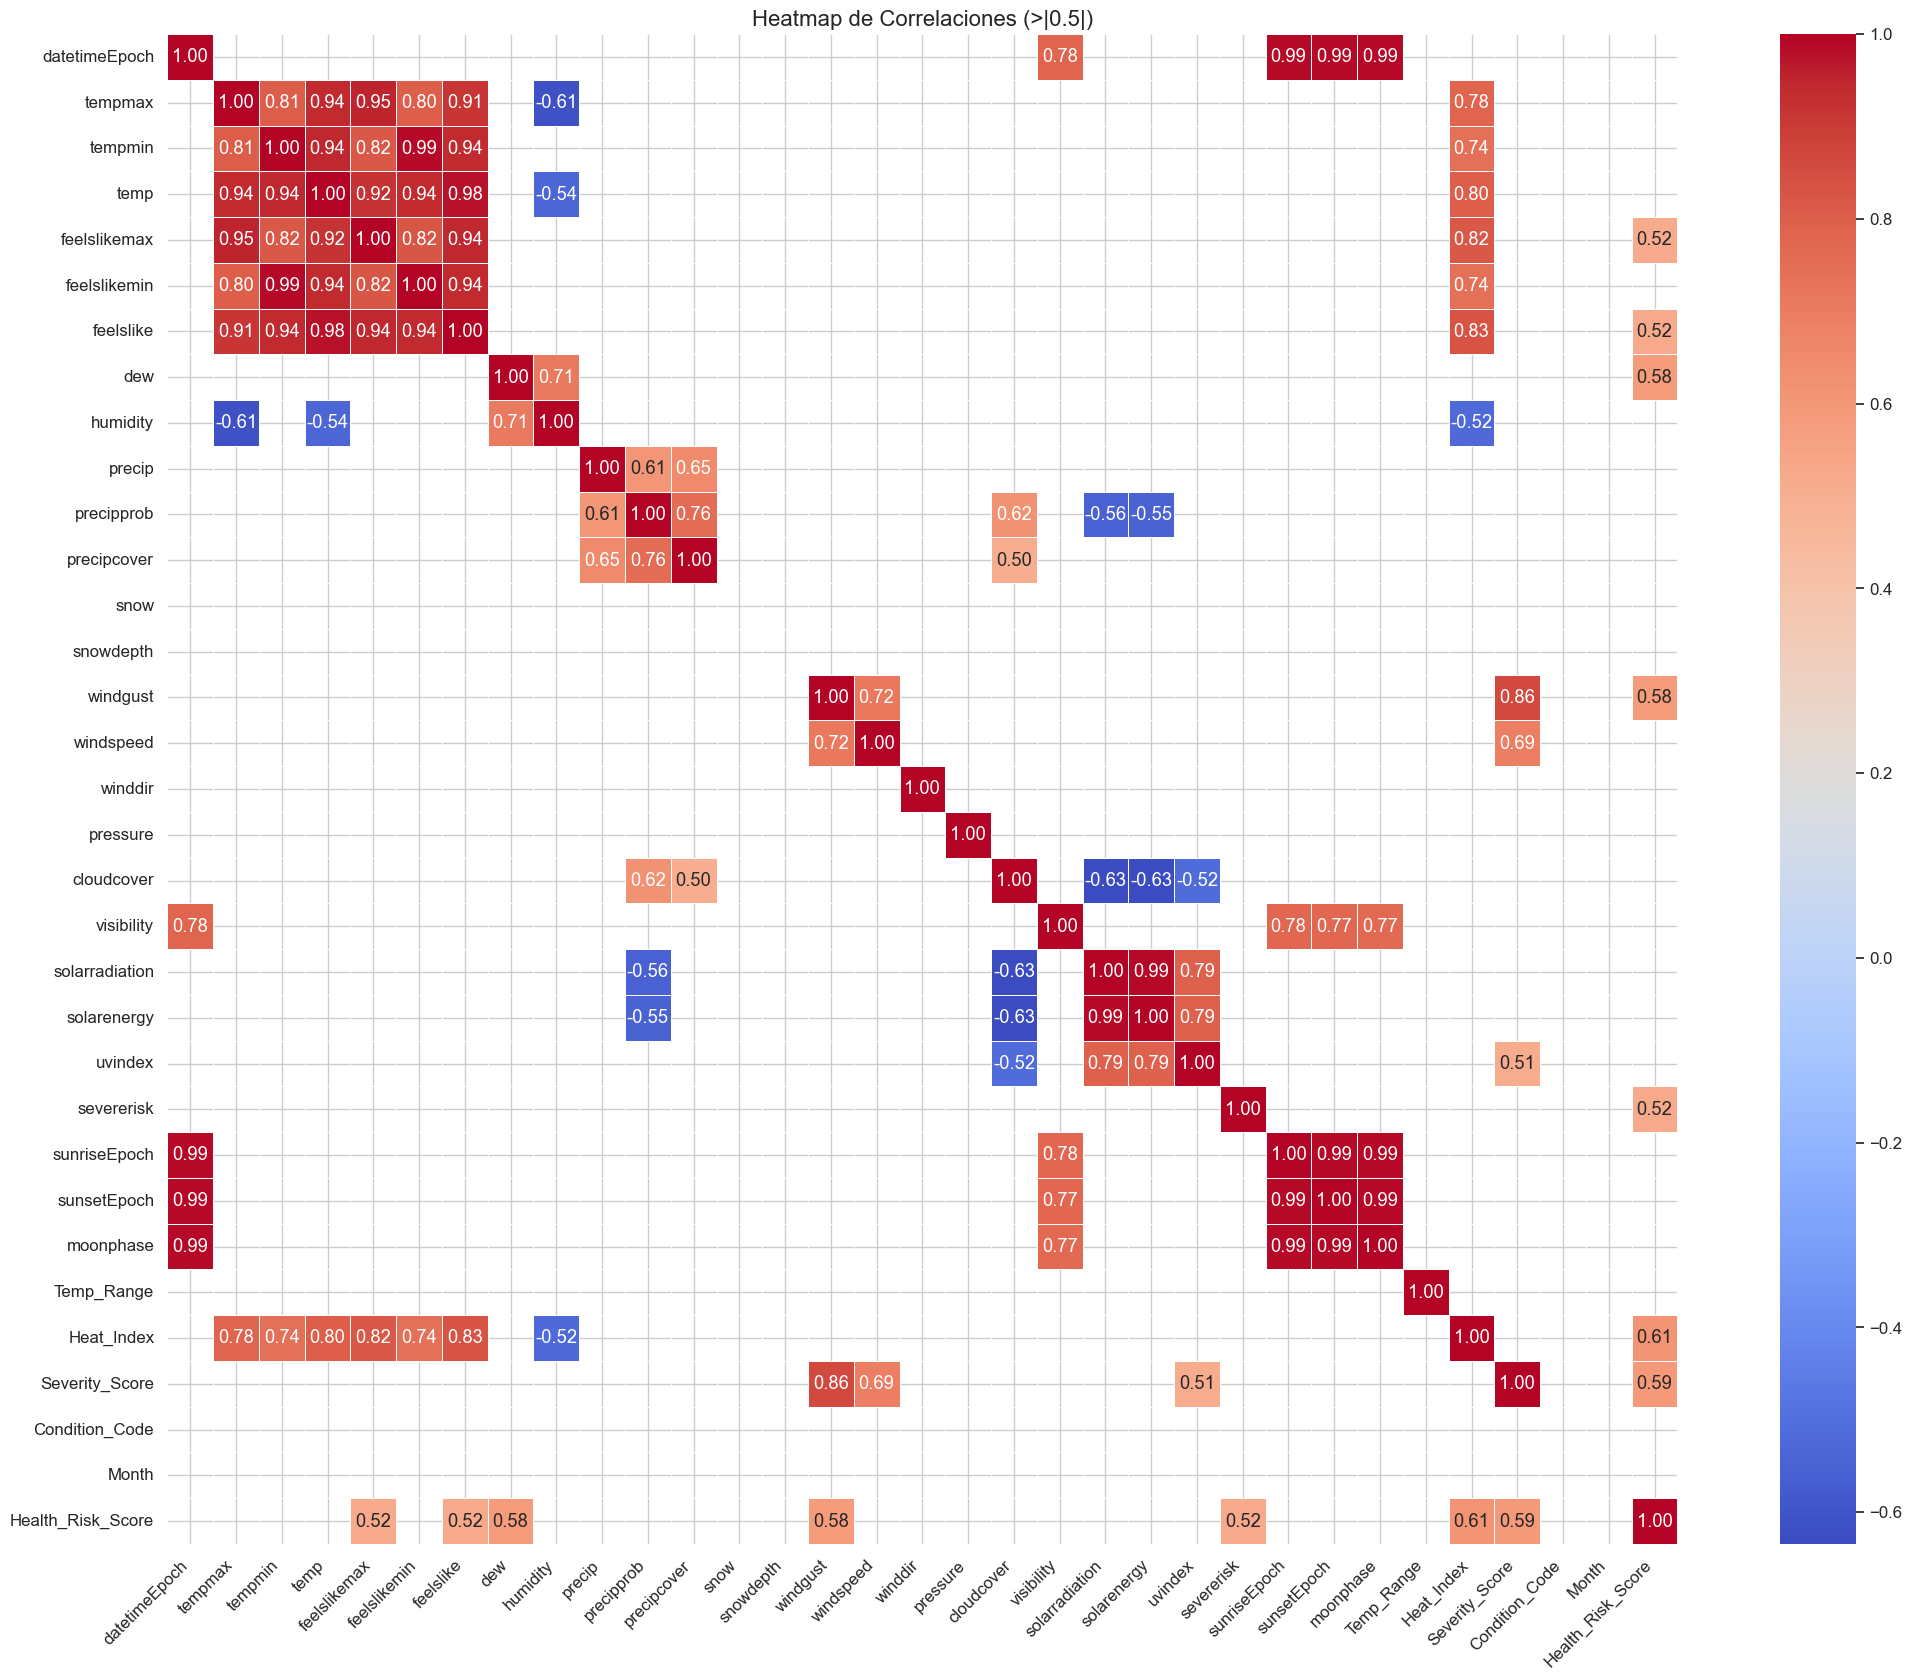

In [619]:
# Matriz de correlaciones entre variables numericas

plt.figure(figsize=(22,17))
numeric_data = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

# Filtrar correlaciones fuertes
threshold = 0.5
mask = np.abs(corr_matrix) >= threshold
filtered_corr = corr_matrix.where(mask)


sns.heatmap(
    filtered_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True,
    square=True
)

plt.title("Heatmap de Correlaciones (>|0.5|)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [620]:
# Correlaciones más altas con Health_Risk_Score
target_corr = corr_matrix["Health_Risk_Score"].sort_values(ascending=False)
print("\n Variables más correlacionadas con Health_Risk_Score:")
print(target_corr.head(20))


 Variables más correlacionadas con Health_Risk_Score:
Health_Risk_Score    1.000000
Heat_Index           0.610722
Severity_Score       0.585555
windgust             0.583670
dew                  0.581391
severerisk           0.524030
feelslike            0.522430
feelslikemax         0.518574
windspeed            0.487805
feelslikemin         0.454905
tempmin              0.434786
temp                 0.412288
tempmax              0.354713
precipprob           0.321389
precipcover          0.284049
humidity             0.186211
uvindex              0.173279
precip               0.143755
cloudcover           0.136964
solarradiation       0.085156
Name: Health_Risk_Score, dtype: float64


In [621]:
# Correlacioes más fuertes entre variables
print("\n Top 10 Correlaciones más fuertes:")
# Obtener triángulo superior sin diagonal
mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_pairs = corr_matrix.where(mask_upper).stack().sort_values(ascending=False)
print(corr_pairs.head(10))



 Top 10 Correlaciones más fuertes:
datetimeEpoch   sunsetEpoch     0.992068
                sunriseEpoch    0.992032
sunriseEpoch    sunsetEpoch     0.991750
solarradiation  solarenergy     0.991296
datetimeEpoch   moonphase       0.990523
sunriseEpoch    moonphase       0.989948
sunsetEpoch     moonphase       0.989882
tempmin         feelslikemin    0.988296
temp            feelslike       0.976463
tempmax         feelslikemax    0.952111
dtype: float64


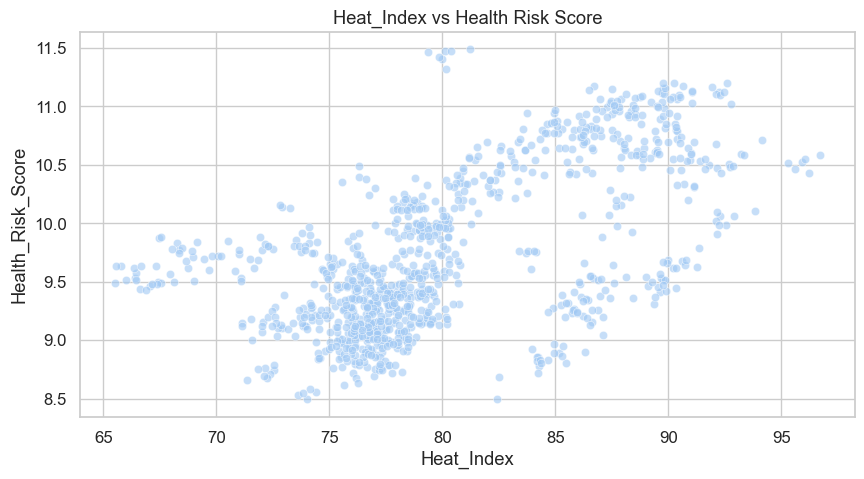

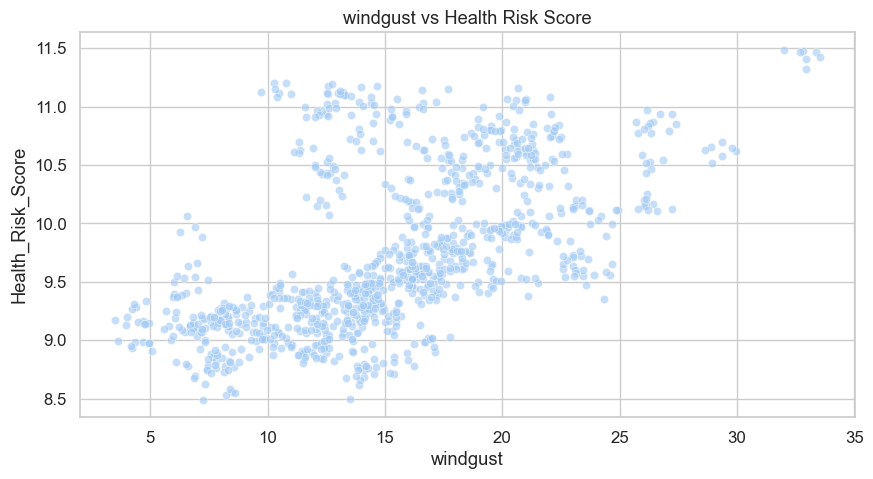

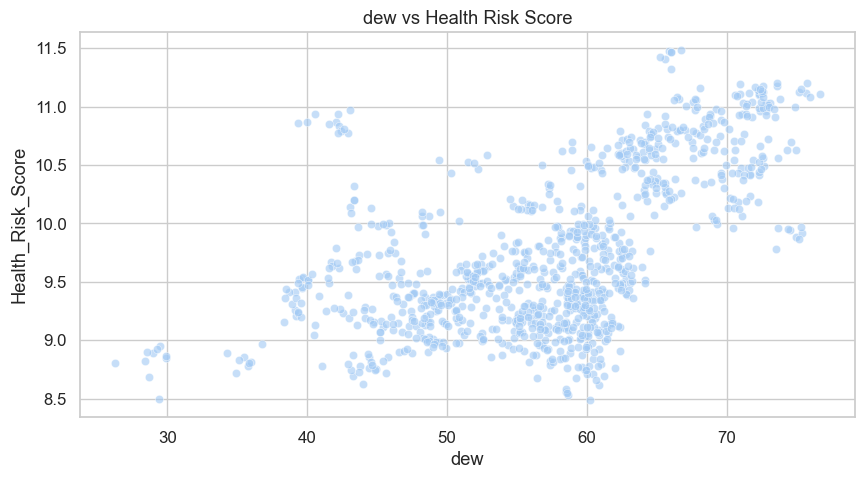

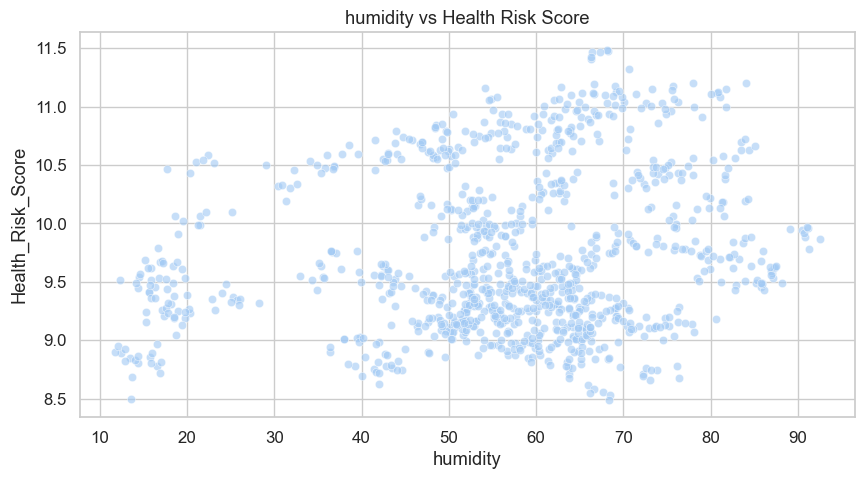

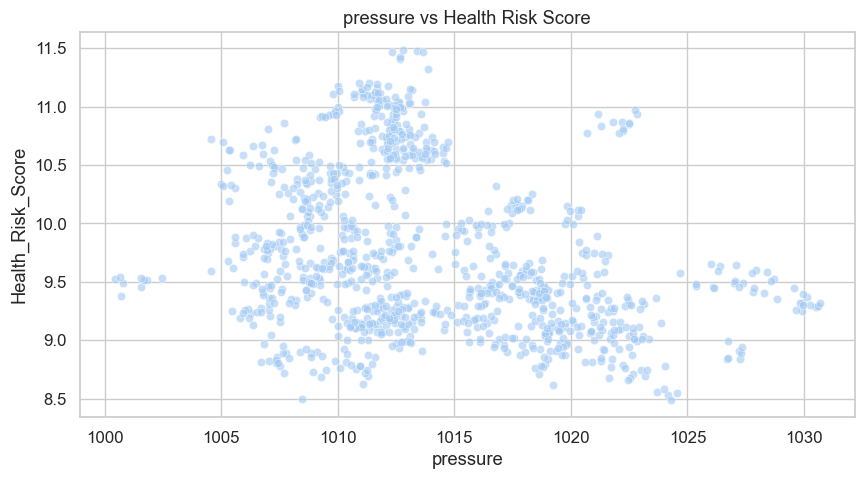

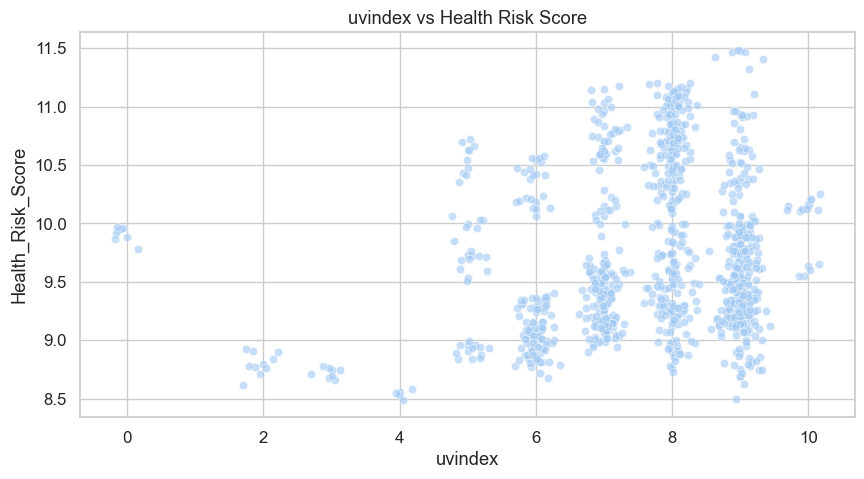

In [622]:
# Scatterplots para comparar variables con Health_Risk_Score

features = ["Heat_Index", "windgust", "dew", "humidity", "pressure", "uvindex"]

for f in features:
    sns.scatterplot(data=df, x=f, y="Health_Risk_Score", alpha=0.6)
    plt.title(f"{f} vs Health Risk Score")
    plt.show()

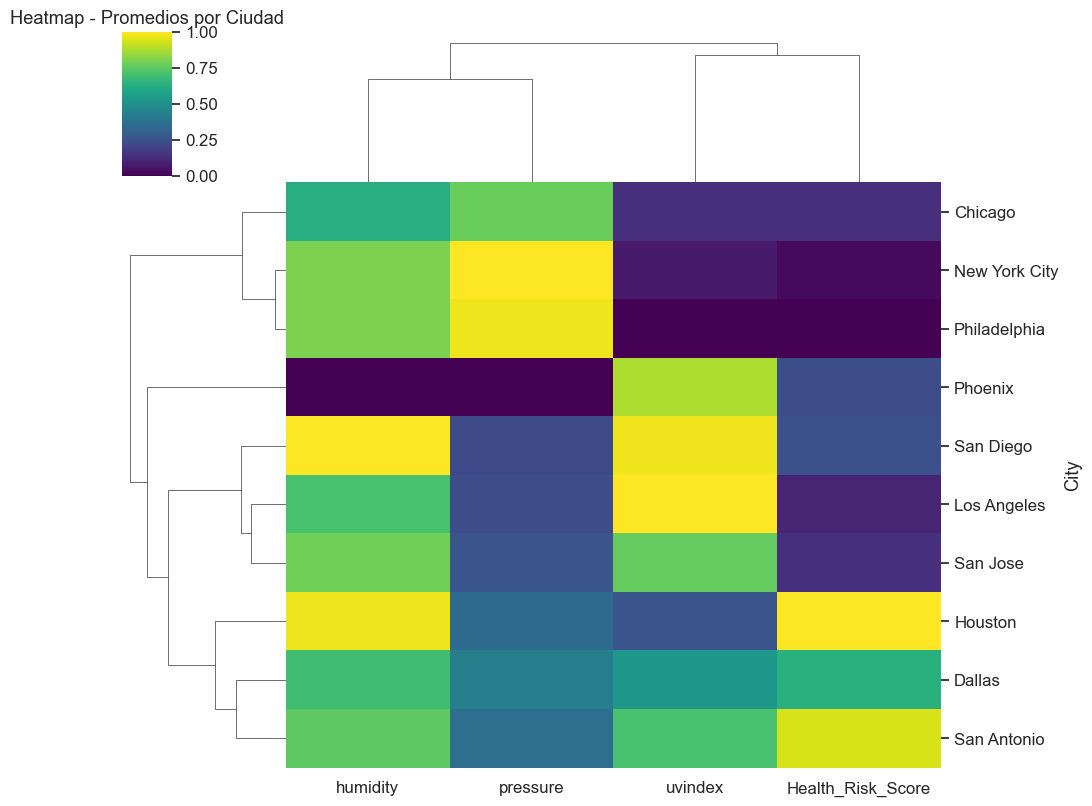

In [623]:
city_means = df.groupby("City")[["humidity", "pressure", "uvindex", "Health_Risk_Score"]].mean()

sns.clustermap(city_means, cmap="viridis", standard_scale=1, figsize=(10, 8))
plt.title("Heatmap - Promedios por Ciudad")
plt.show()

# Pre-procesamiento

In [624]:
# Verificacion de duplucados
df.duplicated().sum()

np.int64(0)

In [625]:
# Verificacion de Valores Nulos
print("\n Valores nulos:\n", df.isnull().sum().sort_values(ascending=False).head(10))


 Valores nulos:
 stations          933
preciptype        622
Condition_Code    431
snowdepth          71
tempmax             0
datetime            0
feelslikemax        0
feelslikemin        0
dew                 0
feelslike           0
dtype: int64


### Imputacion Variables Numericas

In [626]:
# Imputar valores nulos con KKImputer
imputer = KNNImputer(n_neighbors=5)

# Seleccionar columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

### Manejo Variables Categoricas

In [627]:
df_categorical = df.select_dtypes(include=['object', 'category'])

# Llenar valores nulos con la moda

for col in df_categorical.columns:
    if col == 'preciptype':  # Saltar esta variable porque el nulo significa ausencia de lluvia
        continue
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.drop(columns=['stations']) # No aporta valor al dataset


In [628]:
df.isnull().sum().sort_values(ascending=False) # Varificar nulos nuevamente
# Nota: preciptype DEBE tener nulos, representan que no hubo lluvia. Se realizara encoding luego.

preciptype           622
datetimeEpoch          0
tempmax                0
tempmin                0
datetime               0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
temp                   0
precipcover            0
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
pressure               0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunriseEpoch           0
sunset                 0
sunsetEpoch            0
moonphase              0
conditions             0
description            0
icon                   0
source                 0
City                   0
Temp_Range             0
Heat_Index             0
Severity_Score         0
Condition_Code         0


In [629]:
# Remover columnas no necesarias para análisis numérico
cols_excluir = ['datetimeEpoch', 'sunriseEpoch', 'sunsetEpoch']
num_cols = [col for col in num_cols if col not in cols_excluir]

#### Encoding Variables Categoricas

In [630]:
# Lista de variables categoricas
df["preciptype"] = np.where(df["preciptype"].isna(), 0, 1)


# Identificar Variables categoricas sin preciptype
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != "preciptype"]

print(" Columnas categóricas a codificar:")
print(categorical_cols)

# Inicializacion del LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder para cada variable categorica
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # Convertir a string evita errores con NaN o tipos mixtos

 Columnas categóricas a codificar:
['datetime', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'source', 'City', 'Season', 'Day_of_Week']


In [631]:
# Verificación de Ecoding
print("\n Tipos de datos cespues de encoding:")
print(df.dtypes.value_counts())


 Tipos de datos cespues de encoding:
float64    33
int64      11
bool        1
Name: count, dtype: int64


In [632]:
# Convertir a String para formato especial
df['datetimeEpoch'] = df['datetimeEpoch'].apply(lambda x: f'{x:.2f}')

# PCA & Means

PCA es utilizado para visualizar los clusters mas que para reducir dimensionalidad del dataset.

In [633]:
# Agrupar por ciudad (promedios de variables numéricas)
city_df = df.groupby("City").mean(numeric_only=True)
print(" Ciudades agrupadas:", city_df.shape[0])

 Ciudades agrupadas: 10


In [634]:
# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(city_df)

In [635]:
# PCA (reducción a 2 componentes para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [636]:
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=city_df.index)
print("\n Varianza explicada por PCA:", pca.explained_variance_ratio_.sum().round(3))


 Varianza explicada por PCA: 0.599


#### KMeans

In [637]:
k = 3  # Ajustar por observacion
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
city_df["Cluster"] = kmeans.fit_predict(X_scaled)

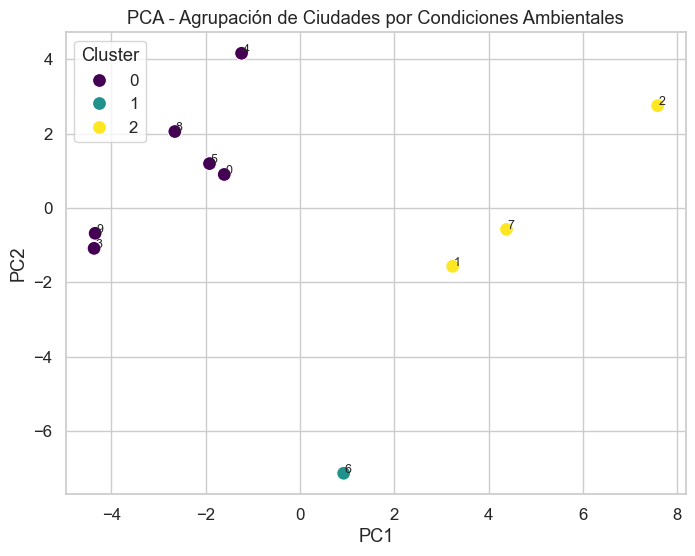

In [638]:
# Visualización PCA + Clusters
pca_df["Cluster"] = city_df["Cluster"]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", s=100, palette="viridis")
for i, city in enumerate(pca_df.index):
    plt.text(pca_df.PC1[i]+0.02, pca_df.PC2[i]+0.02, city, fontsize=9)
plt.title("PCA - Agrupación de Ciudades por Condiciones Ambientales")
plt.show()

In [639]:
# Análisis de clusters
cluster_summary = city_df.groupby("Cluster")[[
    "Health_Risk_Score", "Temp_Range", "humidity", "pressure", "uvindex"
]].mean().round(2)

In [640]:
print("\n Promedio de variables clave por cluster:")
display(cluster_summary)


 Promedio de variables clave por cluster:


,Health_Risk_Score,Temp_Range,humidity,pressure,uvindex
Cluster,,,,,
0,9.41,16.08,61.15,1015.45,7.59
1,9.60,18.56,20.96,1007.11,8.60
2,10.49,16.70,62.13,1012.59,7.62


In [641]:
# Asociar cada ciudad a su cluster
city_clusters = city_df[["Cluster", "Health_Risk_Score"]].reset_index()
print("\n Ciudades y sus clusters:")
display(city_clusters)


 Ciudades y sus clusters:


,City,Cluster,Health_Risk_Score
0,0,0,9.455816
1,1,2,10.174909
2,2,2,10.696952
3,3,0,9.404480
4,4,0,9.295978
5,5,0,9.261695
6,6,1,9.597679
7,7,2,10.607484
8,8,0,9.609616
9,9,0,9.460845


#### Heatmap de Clusters

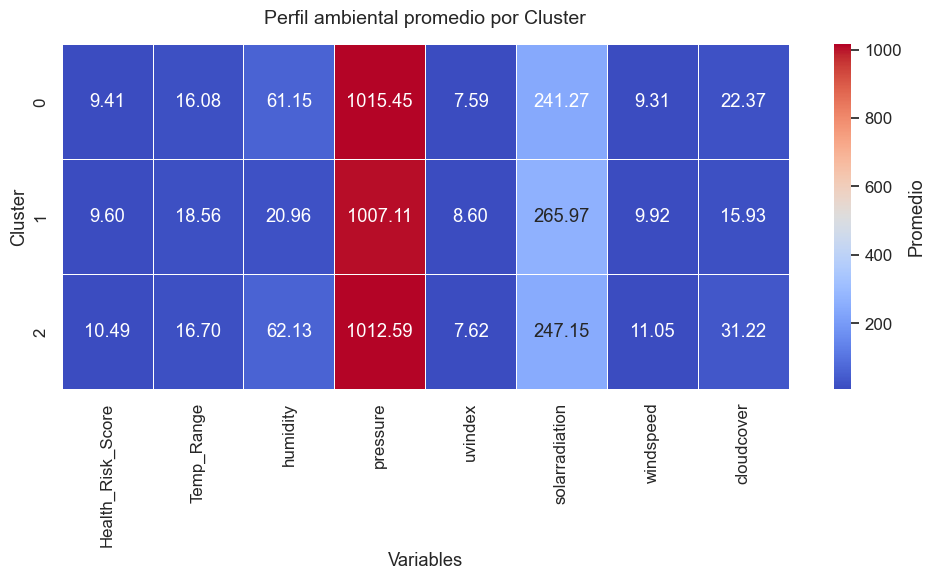

In [642]:
# Preparar datos para el heatmap
vars_for_heatmap = [
    "Health_Risk_Score", "Temp_Range", "humidity", "pressure",
    "uvindex", "solarradiation", "windspeed", "cloudcover"
]

# Promedio de cada variable por cluster
heatmap_data = city_df.groupby("Cluster")[vars_for_heatmap].mean().round(2)

# Heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",         # Colores azul (bajo) y rojo (alto)
    cbar_kws={'label': 'Promedio'},
    linewidths=0.5
)

plt.title("Perfil ambiental promedio por Cluster", fontsize=14, pad=15)
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


# Modelado

In [643]:
# ============================================================
# 0) Instalación  (XGBoost y SHAP)
# ============================================================
#!pip -q install xgboost shap

# ============================================================
# 1) Importaciones y configuración
# ============================================================
import os, warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

# ============================================================
# 2) Subir archivo a Colab y cargar dataset
# ============================================================
df = pd.read_csv("dataset.csv")

# ============================================================
# 3) Limpiezas básicas y detección de columnas
# ============================================================
df_num = df.apply(lambda s: pd.to_numeric(s, errors='ignore'))
df = df_num

# Detectar target por nombres comunes; si no, último numérico
target_col = None
for cand in ["Health_Risk_Score","health_risk_score","risk_score","target"]:
    if cand in df.columns:
        target_col = cand
        break

numeric_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col is None:
    if not numeric_cols_all:
        raise ValueError("No hay columnas numéricas para usar como objetivo.")
    target_col = numeric_cols_all[-1]  # fallback

X_cols_all = [c for c in numeric_cols_all if c != target_col]
if len(X_cols_all) == 0:
    raise ValueError("No hay predictores numéricos distintos al objetivo.")

# ============================================================
# 4) Variables meteo/ambientales para clustering (heurística)
# ============================================================
weather_keywords = [
    "temp","temperature","humidity","pressure","wind","precip","rain","snow",
    "uv","cloud","visibility","dew","heat_index","pm","pm25","pm10","no2","o3","so2","co","aqi"
]
def is_weather(name: str) -> bool:
    ln = str(name).lower()
    return any(k in ln for k in weather_keywords)

weather_cols = [c for c in X_cols_all if is_weather(c)]
if len(weather_cols) < 3:
    weather_cols = X_cols_all.copy()

# ============================================================
# 5) Clustering (selección de K por silhouette en muestra)
# ============================================================
df_cluster_sample = df[weather_cols].replace([np.inf, -np.inf], np.nan).dropna()
if len(df_cluster_sample) > 10000:
    df_cluster_sample = df_cluster_sample.sample(10000, random_state=42)

if len(df_cluster_sample) < 20:
    best_k, best_score = 1, np.nan
    df["cluster"] = 0.0
    etiquetadas = df["cluster"].notna().sum()
else:
    scaler = StandardScaler()
    Xc = scaler.fit_transform(df_cluster_sample)

    best_k, best_score = None, -np.inf
    for k in range(2, 9):
        try:
            km = KMeans(n_clusters=k, n_init=10, random_state=42)
            labels = km.fit_predict(Xc)
            sc = silhouette_score(Xc, labels)
            if sc > best_score:
                best_k, best_score = k, sc
        except Exception:
            continue

    if best_k is None:
        best_k, best_score = 2, np.nan

    kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42).fit(Xc)

    df["cluster"] = np.nan
    mask_full = df[weather_cols].replace([np.inf,-np.inf], np.nan).dropna().index
    X_full_scaled = scaler.transform(df.loc[mask_full, weather_cols])
    df.loc[mask_full, "cluster"] = kmeans.predict(X_full_scaled)
    etiquetadas = df["cluster"].notna().sum()

df.to_csv("dataset_con_clusters.csv", index=False)

# --- FIX DEL PRINT: precalculamos el texto de silhouette ---
sil_text = f"{best_score:.4f}" if not np.isnan(best_score) else "nan"
print(f"[INFO] K seleccionado={best_k} | silhouette={sil_text} | filas etiquetadas={etiquetadas}")

# ============================================================
# 6) XGBoost (opcional); si no está, usamos fallback
# ============================================================
XGB_OK = True
try:
    from xgboost import XGBRegressor
except Exception:
    XGB_OK = False

# ============================================================
# 7) Utilidades de evaluación e importancias (sin 'squared')
# ============================================================
def eval_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # sin 'squared'
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2

def fit_and_eval_models(X, y, scope_name="Global"):
    results = []
    models = {
        "RandomForest": RandomForestRegressor(
            n_estimators=300, random_state=42, n_jobs=-1
        ),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
    }
    if XGB_OK:
        models["XGBoost"] = XGBRegressor(
            random_state=42, n_estimators=500, learning_rate=0.05,
            max_depth=6, subsample=0.9, colsample_bytree=0.9,
            reg_lambda=1.0, n_jobs=-1, tree_method="hist"
        )
    else:
        models["XGB_Fallback"] = HistGradientBoostingRegressor(random_state=42)

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, model in models.items():
        model.fit(Xtr, ytr)
        pred = model.predict(Xte)
        rmse, mae, r2 = eval_metrics(yte, pred)
        results.append({"scope": scope_name, "model": name, "RMSE": rmse, "MAE": mae, "R2": r2})

        if hasattr(model, "feature_importances_"):
            imp = pd.DataFrame({
                "feature": X.columns,
                "importance": model.feature_importances_
            }).sort_values("importance", ascending=False)
            imp.to_csv(f"feature_importance_{scope_name.replace(' ','_')}_{name}.csv", index=False)
        else:
            try:
                perm = permutation_importance(model, Xte, yte, n_repeats=5, random_state=42, n_jobs=-1)
                imp = pd.DataFrame({
                    "feature": X.columns,
                    "importance_mean": perm.importances_mean,
                    "importance_std": perm.importances_std
                }).sort_values("importance_mean", ascending=False)
                imp.to_csv(f"feature_importance_{scope_name.replace(' ','_')}_{name}.csv", index=False)
            except Exception:
                pass
    return results

# ============================================================
# 8) Modelos Globales (baseline)
# ============================================================
df_global = df.dropna(subset=[target_col] + X_cols_all).copy()
Xg, yg = df_global[X_cols_all], df_global[target_col].astype(float)
metrics = fit_and_eval_models(Xg, yg, "Global")

# ============================================================
# 9) Modelos por clúster
# ============================================================
if "cluster" in df.columns:
    clusters_validos = sorted([c for c in df["cluster"].dropna().unique()])
    for cl in clusters_validos:
        sub = df[df["cluster"] == cl].dropna(subset=[target_col] + X_cols_all)
        if len(sub) < 120:
            continue
        Xc, yc = sub[X_cols_all], sub[target_col].astype(float)
        metrics += fit_and_eval_models(Xc, yc, f"Cluster {int(cl)}")

# ============================================================
# 10) Exportar métricas consolidadas
# ============================================================
metrics_df = pd.DataFrame(metrics).sort_values(["scope","R2"], ascending=[True, False])
metrics_df.to_csv("metricas_modelos_por_cluster.csv", index=False)
print("[OK] Métricas exportadas a metricas_modelos_por_cluster.csv")

metrics_df.head(20)



[INFO] K seleccionado=8 | silhouette=0.2977 | filas etiquetadas=541
[OK] Métricas exportadas a metricas_modelos_por_cluster.csv


,scope,model,RMSE,MAE,R2
1,Global,GradientBoosting,0.089282,0.072311,0.975143
2,Global,XGBoost,0.089429,0.070198,0.975061
0,Global,RandomForest,0.110226,0.080377,0.962113


# Visualizacion e Interpretabilidad

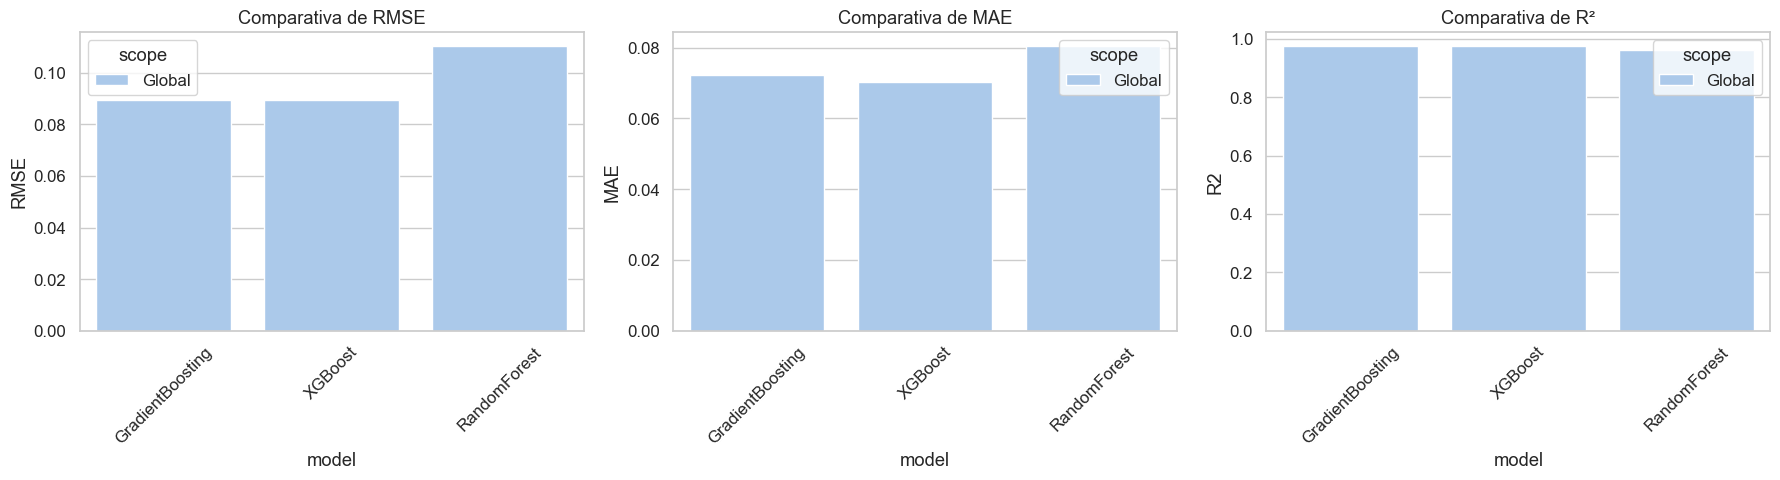

🏆 Mejor modelo global: GradientBoosting con R²=0.9751
 Importancias cargadas desde: feature_importance_Global_GradientBoosting.csv


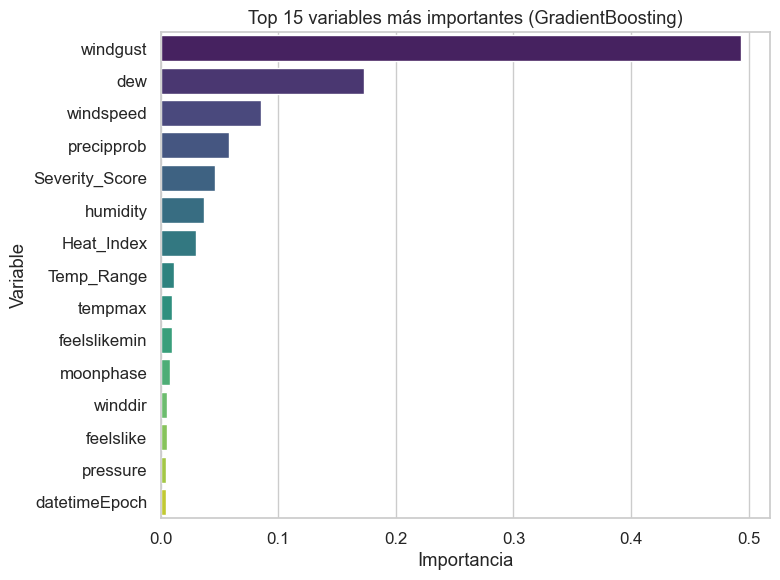

📈 Interpretación general:
- El modelo con mejor desempeño global fue **GradientBoosting**, con un R² de 0.9751, lo que indica una capacidad explicativa muy alta.
- RMSE y MAE bajos sugieren que los errores absolutos y relativos del modelo son pequeños respecto a la escala de la variable objetivo.
- Si hay diferencias entre clusters, estos resultados pueden señalar que ciertas condiciones (por ejemplo, meteorológicas o ambientales) afectan de manera diferenciada el rendimiento predictivo.
- Las variables más importantes te permiten priorizar qué factores tienen mayor influencia en la predicción, útiles para la toma de decisiones y feature engineering futuro.


In [ ]:
# ============================================================
# 11) VISUALIZACIONES DE RENDIMIENTO
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración estética
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 5)

# Leer el archivo exportado
metrics_df = pd.read_csv("metricas_modelos_por_cluster.csv")

# 🔹 1. Comparación general de métricas (RMSE, MAE, R2)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x="model", y="RMSE", hue="scope", data=metrics_df, ax=axes[0])
axes[0].set_title("Comparativa de RMSE")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x="model", y="MAE", hue="scope", data=metrics_df, ax=axes[1])
axes[1].set_title("Comparativa de MAE")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x="model", y="R2", hue="scope", data=metrics_df, ax=axes[2])
axes[2].set_title("Comparativa de R²")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 🔹 2. Mejor modelo global
best_global = metrics_df[metrics_df["scope"] == "Global"].sort_values("R2", ascending=False).head(1)
best_model = best_global.iloc[0]["model"]
print(f"🏆 Mejor modelo global: {best_model} con R²={best_global.iloc[0]['R2']:.4f}")

# ============================================================
# 12) INTERPRETABILIDAD (FEATURE IMPORTANCE)
# ============================================================
# Cargar importancias del mejor modelo (si existe el CSV exportado)
import glob

pattern = f"feature_importance_Global_{best_model}.csv"
files = glob.glob(pattern)
if files:
    imp_df = pd.read_csv(files[0])
    print(f" Importancias cargadas desde: {files[0]}")

    # Normalizar si aplica
    if "importance" in imp_df.columns:
        col_imp = "importance"
    elif "importance_mean" in imp_df.columns:
        col_imp = "importance_mean"
    else:
        raise ValueError("No se encontró columna de importancia válida en el CSV.")

    # Seleccionar top 15
    top_imp = imp_df.sort_values(col_imp, ascending=False).head(15)

    plt.figure(figsize=(8, 6))
    sns.barplot(y="feature", x=col_imp, data=top_imp, palette="viridis")
    plt.title(f"Top 15 variables más importantes ({best_model})")
    plt.xlabel("Importancia")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se encontró archivo de importancias para el mejor modelo global.")

# ============================================================
# 13) INTERPRETACIÓN DE RESULTADOS
# ============================================================
print("📈 Interpretación general:")
print(f"- El modelo con mejor desempeño global fue **{best_model}**, con un R² de {best_global.iloc[0]['R2']:.4f}, lo que indica una capacidad explicativa muy alta.")
print("- RMSE y MAE bajos sugieren que los errores absolutos y relativos del modelo son pequeños respecto a la escala de la variable objetivo.")
print("- Si hay diferencias entre clusters, estos resultados pueden señalar que ciertas condiciones (por ejemplo, meteorológicas o ambientales) afectan de manera diferenciada el rendimiento predictivo.")
print("- Las variables más importantes te permiten priorizar qué factores tienen mayor influencia en la predicción, útiles para la toma de decisiones y feature engineering futuro.")

#### SHAP

In [645]:
city_df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score,Cluster
City,,,,,,,,,,,,,,,,,,,,,
0,7.099237,81.662630,65.314877,73.349698,80.938618,65.345129,73.503144,54.351661,52.980994,0.007341,...,16.501317,78.872238,3.019279,0.0,9.0,0.0,2.877863,0.343511,9.455816,0
1,6.584906,90.068600,72.366313,80.901498,91.452831,72.833751,81.828550,62.349376,56.280617,0.041139,...,17.786003,83.466097,3.346592,0.0,9.0,0.0,2.962264,0.330189,10.174909,2
2,6.730337,88.235871,75.345495,81.084612,92.690115,75.259228,83.603907,69.862354,70.770566,0.107719,...,12.982014,85.195526,3.118024,0.0,9.0,0.0,2.910112,0.359551,10.696952,2
3,7.075269,82.831738,63.239385,71.048605,82.381327,63.120066,71.045213,52.964013,57.071243,0.003954,...,19.615771,77.564349,2.830052,0.0,9.0,0.0,3.182796,0.322581,9.404480,0
4,7.292035,78.578816,65.468240,71.198095,78.701060,65.490287,71.201154,56.963447,61.998322,0.093135,...,13.231812,76.302250,2.708644,0.0,9.0,0.0,2.805310,0.380531,9.295978,0
5,6.372340,81.255779,61.712337,70.586335,80.812602,61.646724,70.540678,55.995345,61.878699,0.028073,...,19.407826,76.336525,2.636661,0.0,9.0,0.0,3.234043,0.244681,9.261695,0
6,6.641509,101.273395,82.631684,91.767833,97.646994,81.400411,89.084932,44.428616,20.956228,0.002697,...,18.562736,88.793130,3.382317,0.0,9.0,0.0,2.924528,0.301887,9.597679,1
7,7.152941,92.529748,73.065330,82.072466,93.730764,73.193820,83.452405,65.009916,59.352298,0.036803,...,19.322169,85.273859,3.570841,0.0,9.0,0.0,2.670588,0.317647,10.607484,2
8,7.118280,73.837509,67.555534,70.586161,74.356530,67.605238,70.881034,60.907567,72.003168,0.003883,...,6.079319,74.463030,3.008954,0.0,9.0,0.0,3.043011,0.344086,9.609616,0


In [646]:
print(city_df["Cluster"].unique())


[0 2 1]


⚠️ Eliminando columnas no numéricas residuales: ['Is_Weekend']


 98%|===================| 4245/4328 [00:25<00:00]        

📊 Visualización global:


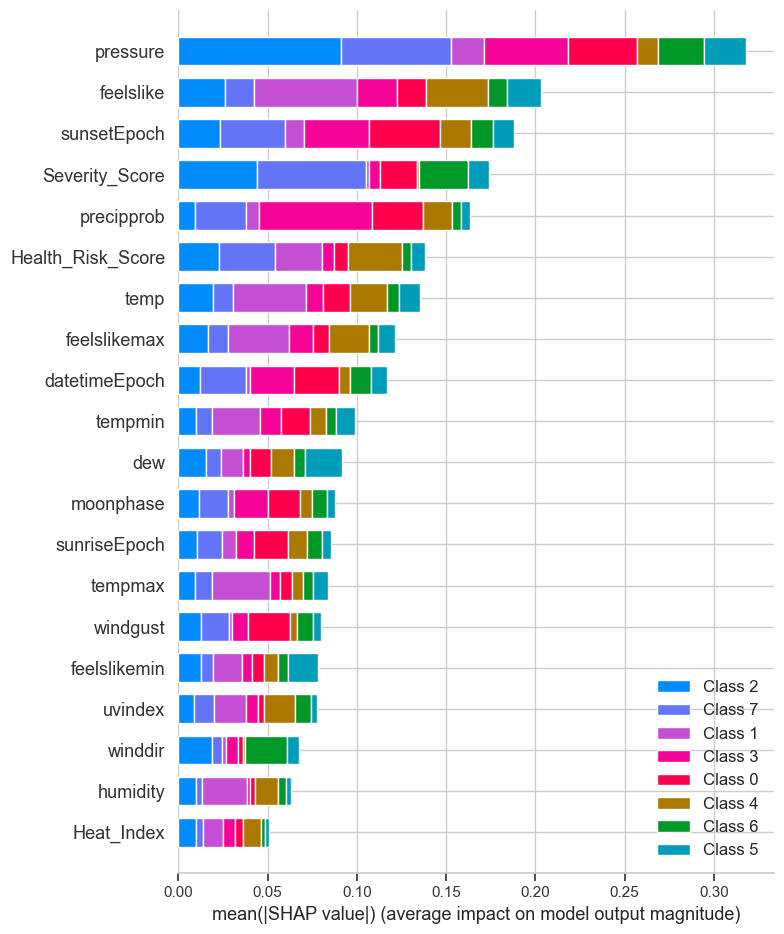

Forma de shap_values.values: (541, 33, 8)
✅ SHAP aplicado exitosamente sobre clusters.


In [652]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Paso 1: Copiar y limpiar el dataset
df = pd.read_csv("dataset_con_clusters.csv")

# Eliminar filas donde 'cluster' es NaN
df = df.dropna(subset=["cluster"])

# Paso 2: Separar variables explicativas y pseudo-target
# Detectar columnas tipo object (texto, íconos, fechas, etc.)
object_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Eliminar columnas tipo object + 'cluster' del conjunto explicativo
X = df.drop(columns=["cluster"] + object_cols)
y = df["cluster"]

# Paso 3: Codificar variables categóricas restantes
X_encoded = pd.get_dummies(X, drop_first=True)

# Paso 4: Eliminar columnas no numéricas residuales (por seguridad)
non_numeric_cols = X_encoded.select_dtypes(exclude=["number"]).columns.tolist()
if non_numeric_cols:
    print("⚠️ Eliminando columnas no numéricas residuales:", non_numeric_cols)
    X_encoded = X_encoded.drop(columns=non_numeric_cols)

# Paso 5: Imputar valores nulos con la media
X_encoded = X_encoded.fillna(X_encoded.mean(numeric_only=True))

# Paso 6: Validar que no queden nulos ni columnas tipo object
assert X_encoded.dtypes.eq("object").sum() == 0, "❌ Aún hay columnas tipo object."
assert X_encoded.isnull().sum().sum() == 0, "❌ Aún hay valores nulos después de la imputación."

# Paso 7: Entrenar modelo para replicar clustering
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

# Paso 8: Aplicar SHAP
explainer = shap.Explainer(model, X_encoded)
shap_values = explainer(X_encoded)

# Paso 9: Visualizar resultados
print("📊 Visualización global:")
shap.summary_plot(shap_values, X_encoded)

#print("📌 Waterfall plot de la primera muestra:")
#shap.plots.waterfall(shap_values[0])

print("Forma de shap_values.values:", shap_values.values.shape)

print("✅ SHAP aplicado exitosamente sobre clusters.")

In [653]:
# Verificar forma de los valores SHAP
print("SHAP shape:", shap_values.values.shape)  # (541, 33, 8)

# Transponer para obtener (samples, classes, features)
shap_values_by_class = shap_values.values.transpose(0, 2, 1)  # → (541, 8, 33)

# Crear un diccionario con DataFrames por clase
shap_by_class = {}
for i in range(shap_values_by_class.shape[1]):  # n_classes = 8
    class_shap = shap_values_by_class[:, i, :]  # (541, 33)
    df_class = pd.DataFrame(class_shap, columns=X_encoded.columns)
    shap_by_class[f"class_{i}"] = df_class

# Mostrar las 10 variables más influyentes por clase
for class_id, df_shap in shap_by_class.items():
    print(f"\n🔝 Variables más influyentes para {class_id}:")
    top_vars = df_shap.mean().sort_values(ascending=False).head(10)
    print(top_vars)

SHAP shape: (541, 33, 8)

🔝 Variables más influyentes para class_0:
sunsetEpoch      0.005407
pressure         0.004618
windgust         0.003587
datetimeEpoch    0.003243
moonphase        0.003100
sunriseEpoch     0.002766
tempmin          0.002081
feelslike        0.001616
temp             0.001456
dew              0.001253
dtype: float64

🔝 Variables más influyentes para class_1:
uvindex           0.000192
Temp_Range        0.000177
dew               0.000147
precipcover       0.000067
moonphase         0.000063
winddir           0.000040
precip            0.000012
Month             0.000000
snow              0.000000
Condition_Code    0.000000
dtype: float64

🔝 Variables más influyentes para class_2:
pressure             0.011807
Severity_Score       0.007238
Health_Risk_Score    0.003426
uvindex              0.002089
feelslike            0.001401
temp                 0.001250
humidity             0.001158
winddir              0.001150
Heat_Index           0.001145
feelslikemax    

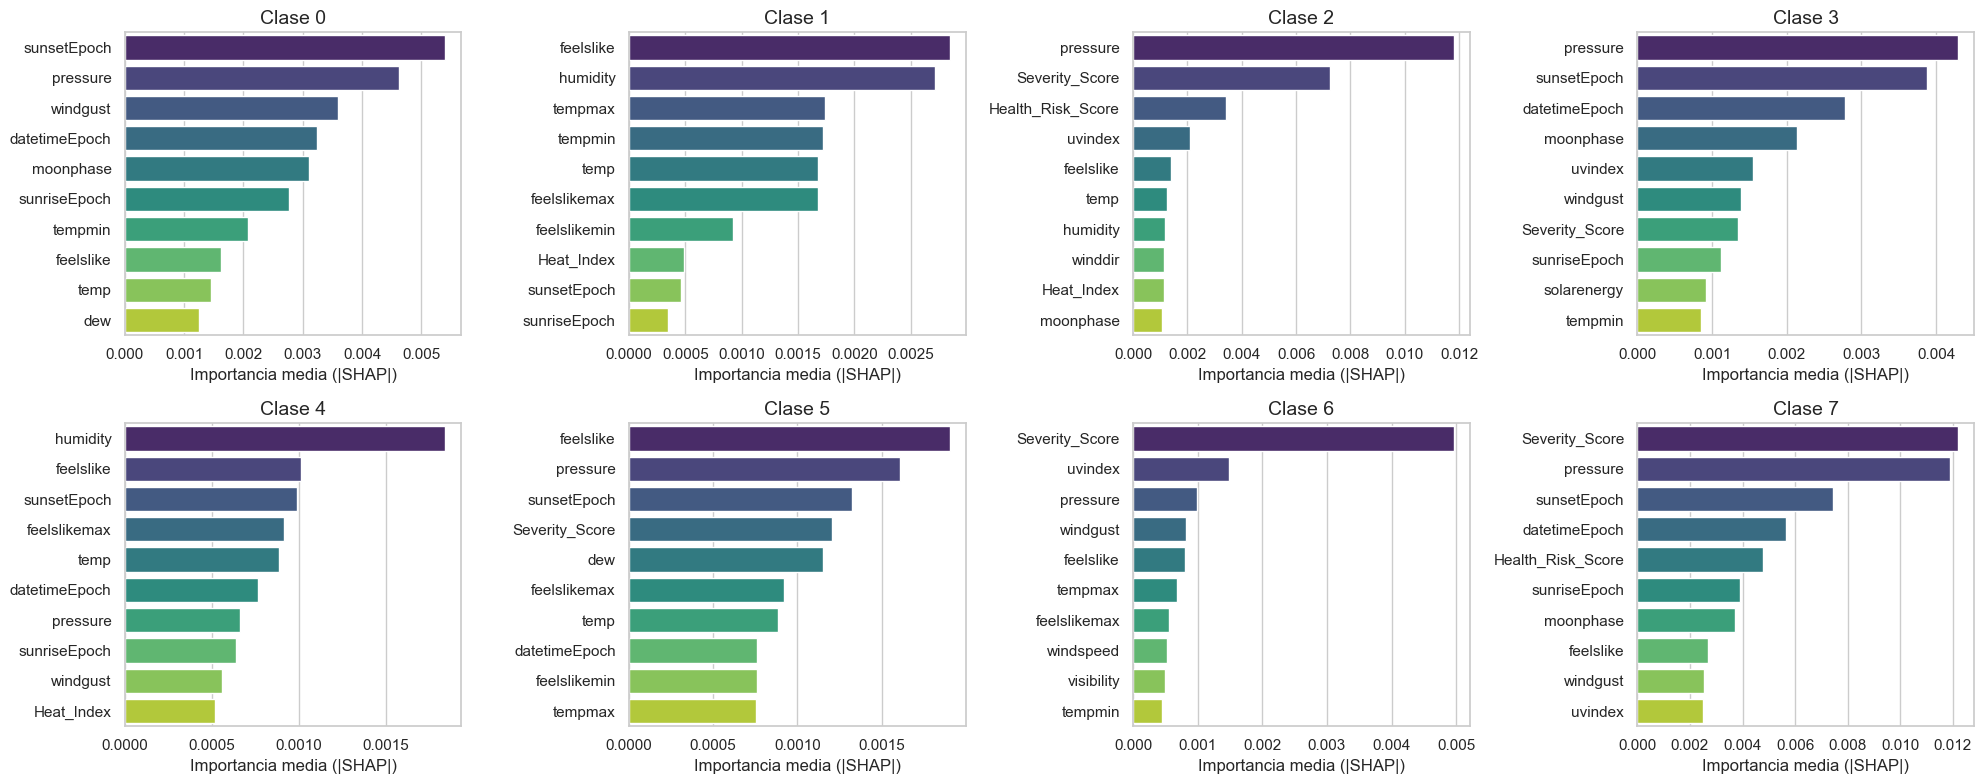

In [654]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")
n_classes = len(shap_by_class)
n_cols = 4
n_rows = (n_classes + n_cols - 1) // n_cols

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

# Graficar top 10 variables por clase
for i, (class_id, df_shap) in enumerate(shap_by_class.items()):
    top_vars = df_shap.mean().abs().sort_values(ascending=False).head(10)
    sns.barplot(x=top_vars.values, y=top_vars.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Clase {i}", fontsize=14)
    axes[i].set_xlabel("Importancia media (|SHAP|)")
    axes[i].set_ylabel("")

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()